<a href="https://colab.research.google.com/github/dauvannam321/ReadingList/blob/main/EfficientNet/EfficientNet_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use EfficientNetB0 for classifying 1000 classes of images from imagenet, we can use Imagenet weights.

from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')  #trained on 1000 classes of Imagenet dataset

21834768/21834768 [==============================] - 2s 0us/step


##**Model architecture**

In [2]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0

##**Classify on unseen image**

In [3]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [17]:
import requests

url = 'https://i.natgeofe.com/k/63b1a8a7-0081-493e-8b53-81d01261ab5d/red-panda-full-body_16x9.jpg?w=1200'
img_data = requests.get(url).content
with open('red-panda-full-body_16x9.jpg', 'wb') as handler:
    handler.write(img_data)

Input image shape: (1, 224, 224, 3)


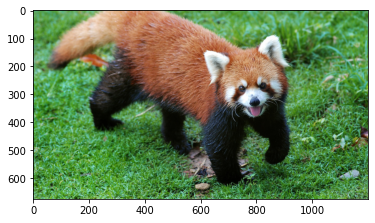

In [18]:
img_path = '/content/red-panda-full-body_16x9.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [19]:
preds=model.predict(x)
# print("predicted class: ", preds )    # probabilities for being in each of the 1000 classes
decode_predictions(preds,top=3)  #  # probabilities for being in top of the 3 classes

1/1 [==============================] - 0s 23ms/step


[[('n02509815', 'lesser_panda', 0.864247),
  ('n02132136', 'brown_bear', 0.055534586),
  ('n02133161', 'American_black_bear', 0.00855616)]]